<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Types-of-Violations" data-toc-modified-id="Types-of-Violations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Types of Violations</a></span></li><li><span><a href="#Place-Description-for-each-Violation-Type" data-toc-modified-id="Place-Description-for-each-Violation-Type-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Place Description for each Violation Type</a></span><ul class="toc-item"><li><span><a href="#Violation-in-Chain/Non-Chain-Places" data-toc-modified-id="Violation-in-Chain/Non-Chain-Places-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Violation in Chain/Non-Chain Places</a></span></li></ul></li><li><span><a href="#Restaurant's-Age-and-Violation-Type" data-toc-modified-id="Restaurant's-Age-and-Violation-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Restaurant's Age and Violation Type</a></span></li><li><span><a href="#Star-Reviews-and-Violation" data-toc-modified-id="Star-Reviews-and-Violation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Star Reviews and Violation</a></span></li><li><span><a href="#Reviews-Counts-and-Violations" data-toc-modified-id="Reviews-Counts-and-Violations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reviews Counts and Violations</a></span></li><li><span><a href="#Violations-by-Zip-Codes" data-toc-modified-id="Violations-by-Zip-Codes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Violations by Zip Codes</a></span></li><li><span><a href="#Violations-and-Yelp-Attributes" data-toc-modified-id="Violations-and-Yelp-Attributes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Violations and Yelp Attributes</a></span><ul class="toc-item"><li><span><a href="#Alcohol" data-toc-modified-id="Alcohol-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Alcohol</a></span></li><li><span><a href="#Good-For-Kids" data-toc-modified-id="Good-For-Kids-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Good For Kids</a></span></li><li><span><a href="#Price-Range" data-toc-modified-id="Price-Range-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Price Range</a></span></li></ul></li><li><span><a href="#Violations-and-Yelp-Categories" data-toc-modified-id="Violations-and-Yelp-Categories-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Violations and Yelp Categories</a></span><ul class="toc-item"><li><span><a href="#Cuisine" data-toc-modified-id="Cuisine-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Cuisine</a></span></li><li><span><a href="#Specialty-Food" data-toc-modified-id="Specialty-Food-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Specialty Food</a></span></li><li><span><a href="#Place" data-toc-modified-id="Place-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Place</a></span></li></ul></li><li><span><a href="#Do-restaurants-do-better-with-time?" data-toc-modified-id="Do-restaurants-do-better-with-time?-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Do restaurants do better with time?</a></span></li><li><span><a href="#Sentiment-Analysis-of-Text-Reviews" data-toc-modified-id="Sentiment-Analysis-of-Text-Reviews-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Sentiment Analysis of Text Reviews</a></span></li><li><span><a href="#Topic-Modeling" data-toc-modified-id="Topic-Modeling-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Topic Modeling</a></span></li></ul></div>

After having cleaned the violation and business datasets, we now explore how the information and attributes of the restaurants are associated with the type of violation detected during inspection of the restaurants.

The inspection and Yelp datasets provide several information about each restaurant, which includes: location, description of the place, starting business date, number of star reviews, total number of reviews, cuisine served, special food served and some characteristics of the place. The inspection dataset also includes inspection time and results (number of low, medium and high violations), and Yelp  dataset includes text reviews for each restaurant. By examining this information, we would like to find the features that help in identifying which restaurants are more likely to make a violation.

In particular, we analyze both datasets and examine if violations are changing across time and season, and if they are following any trends. Do they more occur in restaurants, grocery stores, food facilities in schools, or other places? Are there any differences in the number of violations between chain and non-chain restaurants? In which regions of Allegheny county, the violations are focused? How does the age of restaurants affect their inspection results? Do old restaurants follow regulations more thoroughly? How do popular, high star review and expensive restaurants perform in terms of hygiene? In which cuisine, do violations occur more? Do restaurants with high number of violations serve a specific type of food? Can text reviews help in identifying any possible violation? In this report, by exploring the inspection and yelp datasets, we address those questions and gain insights about the circumstances of each type of violations.

# Loading the data

We first import the required modules and load the clean data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
data = pd.read_csv("dataset.csv")

# Types of Violations

We start our analysis by checking the types of violations reported and how they are evolving across time. During each inspection of a given restaurant, all detected violations are classified into low, medium or high violation, and multiple violations can be found during same inspection. Let us check which type of violation is more common and if there is any trend in their occurrences across time.

*How many low, medium and high violations occur per Inspection?*

To check how large each number of violation can be per inspection, we examine their distribution by plotting the box plot of each.

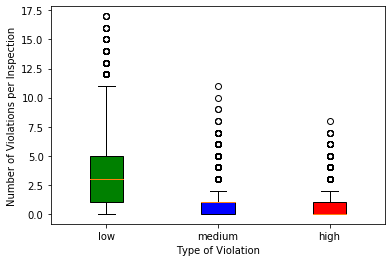

In [4]:
bplt = plt.boxplot(data[['low', 'medium', 'high']].T, vert=True, labels=[
                   'low', 'medium', 'high'], patch_artist=True)
colors = ['green', 'blue', 'red']
for patch, color in zip(bplt['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel("Number of Violations per Inspection")
plt.xlabel("Type of Violation")
plt.show()

We see that the number of low violation per inspection is more spread than that of medium and high violations. Also, the number of low violations found in an inspection can be larger than that of medium and low violations. We also notice that more than 50% of the number of high violations is zero, which means that they are the less common than the other two types of violations. We can check how common each type of violation is, by computing their non-zero percentage.  

In [20]:
print("Percentage of non-zero low violations:",
      100*len(data[data.low > 0])/len(data))
print("Percentage of non-zero medium violations:",
      100*len(data[data.medium > 0])/len(data))
print("Percentage of non-zero high violations:",
      100*len(data[data.high > 0])/len(data))

Percentage of non-zero low violations: 87.09115646258503
Percentage of non-zero medium violations: 53.289795918367346
Percentage of non-zero high violations: 39.57006802721089


*How are violations changing over time?*

Let us now check the evolution of the number of each violation type with time, to see if there is an increase or decrease in their occurrence.

We count the average number of each type of violation for each month.

In [23]:
# Count the number of violations for each month
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])
hist = data[['inspect_dt','low','medium','high']]
hist = hist.assign(inspect_my= hist['inspect_dt'].apply(
    lambda x: pd.to_datetime(str(datetime.date(x.year, x.month, 1)))))
trend = hist.groupby(["inspect_my"])[['low','medium','high']].mean()

We then plot the evolution of the average number of violations.

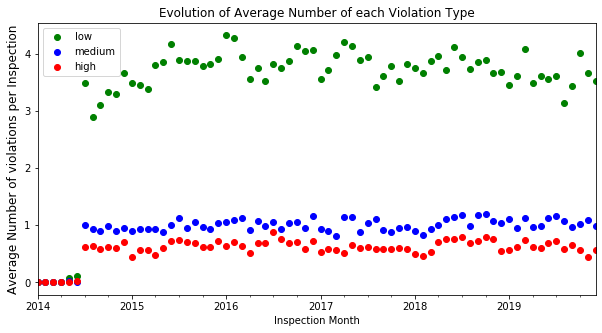

In [24]:
trend.plot(figsize=(10, 5), color=['green', 'blue','red'],marker='o',linestyle='')
plt.ylabel('Average Number of violations per Inspection', fontsize=12)
plt.xlabel('Inspection Month')
plt.title('Evolution of Average Number of each Violation Type')
plt.show()

We see that on average the number of each type of violations is not decreasing with time, which implies the importance of doing regular inspections for the food facilities and restaurants. 

# Place Description for each Violation Type

The column 'description' provides a brief description of the facility inspected. More specifically, it specifies whether the inspected place is a restaurant, supermarket or convenience store, and whether it belongs to a chain and if it provides liquor. We now check in which places each type of violation occur more.

First let us check the categories of places provided by the column 'description'

In [25]:
data.description.value_counts()

Restaurant without Liquor                            5624
Restaurant with Liquor                               5262
Chain Restaurant without Liquor                      3419
Chain Restaurant with Liquor                         1856
Chain Supermarket                                     421
Retail/Convenience Store                              390
Chain Packaged Food Only                              247
Chain Retail/Convenience Store                        215
Bakery                                                174
Food Processor                                        134
Supermarket                                           114
Packaged Food Only                                     73
Caterer                                                72
Chain Bakery                                           63
Rooming House with Guest food Service                  55
Hospital/Other Institution                             42
Mobile - Tier II ( Prepared Foods)                     40
School Full Se

We next focus on places that were at least 10 times inspected.

In [26]:
places_to_focus = (data.description.value_counts()).reset_index()
places_to_focus = list(
    places_to_focus[places_to_focus.description >= 10]['index'])
subset_data = data[(data.description.isin(places_to_focus))]

Since each restaurant can be inspected many times, we compute first the average of each type of violations for each restaurant.

In [27]:
subset_data = subset_data[["description", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "description"])['low', 'medium', 'high'].mean().reset_index()

Now, for each type of place, we compute the average and maximum number of each violation type detected per inspection.

In [28]:
desc_mean = subset_data.groupby(["description"])[
    ['low', 'medium', 'high']].mean().reset_index()
desc_max = subset_data.groupby(["description"])[
    ['low', 'medium', 'high']].max().reset_index()
description = desc_mean.merge(
    desc_max, on='description', suffixes=['_mean', '_max'])

We now visualize the obtained averages and maximum values for each type place. We first shorten some of the names of places (of column 'description'), because we will use them to annotate the points on the plots.

In [29]:
description['description'] = description.description.apply(
    lambda s: s.replace('Restaurant', "Rest."))
description['description'] = description.description.apply(
    lambda s: s.replace('Retail/Convenience', 'Retail'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Nursing Home/Personal Care Comb.', 'Nursing Home'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Rooming House with Guest food Service', 'Rooming House'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Kitchen', 'Kit.'))

To make the visualization clearer to read, we provide a separate plot for each violation type. In each plot, we plot the average number of violations vs the maximum number of violations for each type of place.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


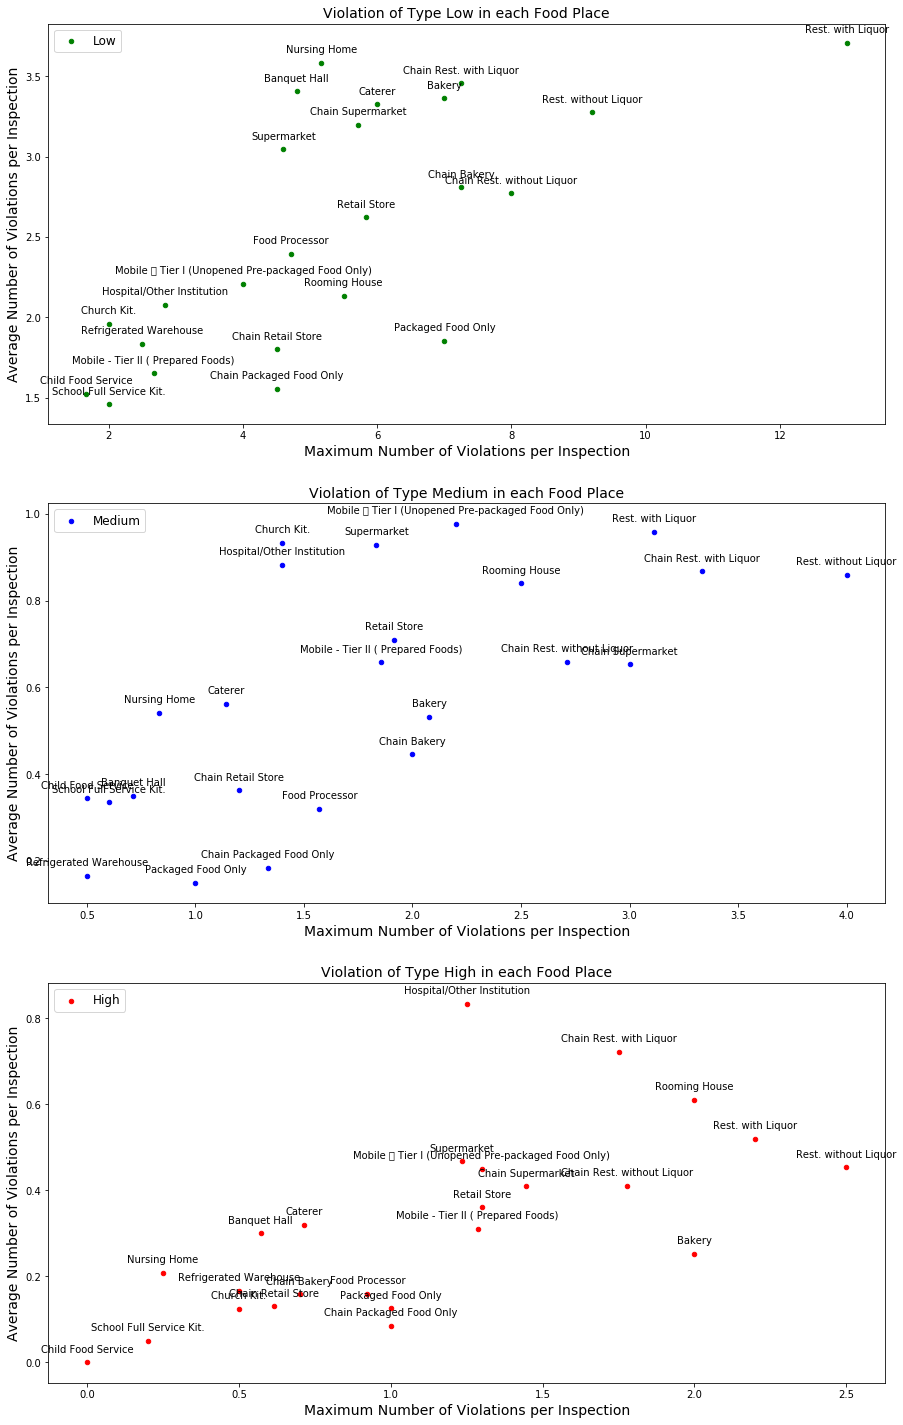

In [30]:
figure, axes = plt.subplots(3, 1, figsize=(15, 25))

description.plot.scatter('low_max', 'low_mean', c='g', label='Low', ax=axes[0])
for x, y, place in zip(description.low_max, description.low_mean,
                       description.description):
    axes[0].annotate(place,  
                     (x, y),  
                     textcoords="offset points", 
                     xytext=(0, 10),  
                     ha='center')
axes[0].set_title('Violation of Type Low in each Food Place', fontsize=14)

description.plot.scatter('medium_max', 'medium_mean',
                         c='b', label='Medium', ax=axes[1])
for x, y, place in zip(description.medium_max, description.medium_mean,
                       description.description):
    axes[1].annotate(place,  
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[1].set_title('Violation of Type Medium in each Food Place', fontsize=14)

description.plot.scatter('high_max', 'high_mean',
                         c='r', label='High', ax=axes[2])
for x, y, place in zip(description.high_max, description.high_mean,
                       description.description):
    axes[2].annotate(place, 
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[2].set_title('Violation of Type High in each Food Place', fontsize=14)

for axe in axes:
    axe.set_ylabel('Average Number of Violations per Inspection', fontsize=14)
    axe.set_xlabel('Maximum Number of Violations per Inspection', fontsize=14)
    axe.legend(loc='upper left', fontsize=12)

plt.show()

In the above plots, the less clean food facilities appear in the upper right corner of the plot and the cleaner facilities appear in the lower left corner of the plot. We notice that for all violation types, the high numbers of violations are mainly detected in restaurants. On the other hand, cleaner places are those that provide child food or inside a school or refrigerated warehouses. Moreover, we notice that "rooming house" and mobile restaurants are places with high number of medium violations, and that "rooming house" and interestingly "Hospital/Other Institution" are places with high number of high violations.

## Violation in Chain/Non-Chain Places

We now zoom into the chain and non chain places, to check if this characteristic can be associated with the type of violation.

We first extract the places that belong to a chain and those that do not belong. We then add an indicator column that specifies this characteristic. 

In [31]:
non_chain = ['Bakery', 'Packaged Food Only', 'Restaurant with Liquor',
             'Restaurant without Liquor',
             'Retail/Convenience Store', 'Supermarket']
chain = ['Chain Bakery', 'Chain Packaged Food Only', 'Chain Restaurant with Liquor',
         'Chain Restaurant without Liquor', 'Chain Retail/Convenience Store',
         'Chain Supermarket']
pl_chain = subset_data[['description', 'low', 'medium', 'high']]
chains = pl_chain['description'].apply(lambda s: 1 if s in chain else 0)
pl_chain = pl_chain.assign(chain=chains)
pl_chain = pl_chain[((pl_chain.description.isin(chain)) |
                     (pl_chain.description.isin(non_chain)))]

We then plot the violin plots for each type of violation and then compare them between the chain and non-chain places.

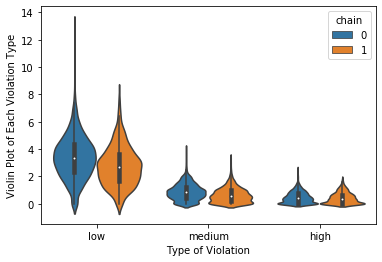

In [32]:
pl_chain = pl_chain.melt(['description', 'chain'],
                         var_name='violation', value_name='number')
sns.violinplot(data= pl_chain, x='violation',y='number',hue='chain')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We do not see a great difference in the distribution of number of violations detected between chain and non-chain places. However, we see that the highest number of violations for each type occurred in non-chain places and that the distribution of violation is more spread for non-chain places. This might be because the number of non chain places is higher than the number of chain places.

In [41]:
print("The number of non-chain places:",sum(pl_chain.chain==0))
print("The number of chain places:",sum(pl_chain.chain==1))

The number of non-chain places: 4809
The number of chain places: 2637


Or it might be because chain restaurants have to follow strict corporates standards.

# Restaurant's Age and Violation Type 

For each restaurant, the business starting date is given in the column "bus_st_date". From this column, we can find the age of the restaurant on the inspection day. Let us check if the fact that the restaurant is new or old can help in predicting the violation type.

We first compute the age (in years) at the inspection by subtracting the entries of column "bus_st_date" from the column "inspect_dt" (inspection date).

In [42]:
data_age = data[['inspect_dt','bus_st_date','low','medium','high']]
data_age = data_age[data_age.bus_st_date != 'none']
data_age['age'] = (pd.to_datetime(data_age['inspect_dt']) -
              pd.to_datetime(data_age['bus_st_date'])).apply(lambda x: x.days/365)

We then plot the number of each violation type with respect to the age of the restaurant (in years).

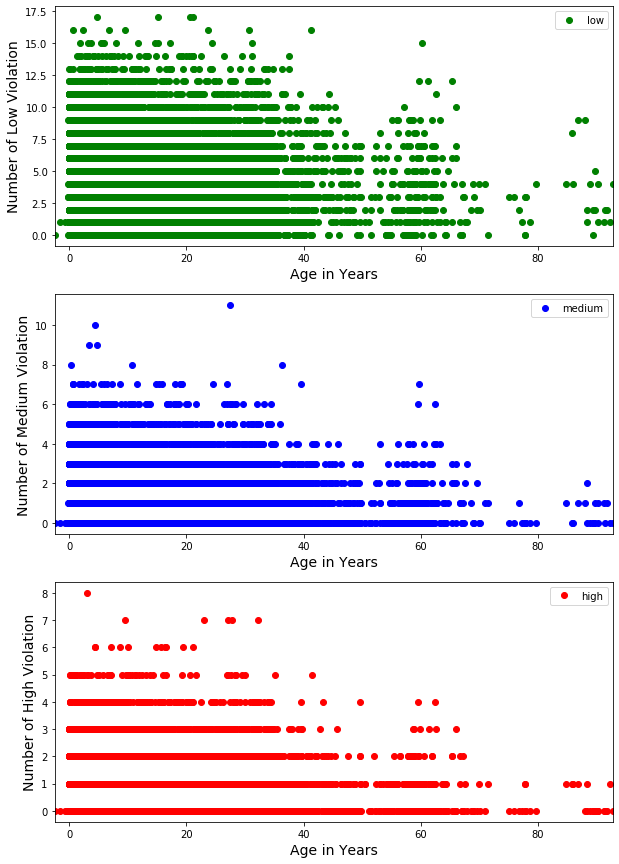

In [14]:
figure, axes = plt.subplots(3, 1, figsize=(10, 15))

data_age.plot('age', 'low',marker='o',linestyle='',ax=axes[0],color='g')
axes[0].set_xlabel('Age in Years', fontsize=14)
axes[0].set_ylabel('Number of Low Violation',fontsize=14)

data_age.plot('age', 'medium',marker='o',linestyle='',ax=axes[1],color='b')
axes[1].set_xlabel('Age in Years', fontsize=14)
axes[1].set_ylabel('Number of Medium Violation',fontsize=14)

data_age.plot('age', 'high',marker='o',linestyle='',ax=axes[2],color='r')
axes[2].set_xlabel('Age in Years', fontsize=14)
axes[2].set_ylabel('Number of High Violation',fontsize=14)
plt.show()
plt.show()

We mainly notice that the highest number of low, medium and high violations did not occur in old restaurants. Also as the number of violation increases, the maximum age of the restaurant at which this number of violation was found decreases. This might be because old restaurants are more experienced and aware of the regulations, or they follow more rigorously the regulations to maintain their reputation.

# Star Reviews and Violation

Based on the reviews, each restaurant in Yelp is assigned some number of stars (from 1 to 5). Let us check how each category of these restaurants performs during inspection. Do 5-star review restaurant make less violation? Do restaurants that people like abide more by the regulations or do they still make violations?

To answer those questions, let us plot the violin plot of each violation type for each restaurant star category.

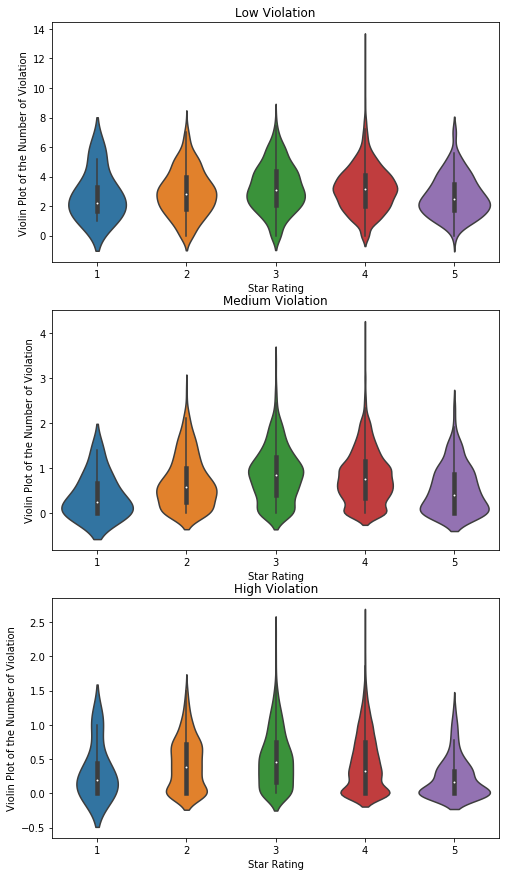

In [49]:
data_st = data[["stars", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "stars"])['low', 'medium', 'high'].mean().reset_index()
data_st['stars'] = data_st['stars'].apply(round)

figure, axes = plt.subplots(3, 1, figsize=(8, 15))


sns.violinplot(data= data_st, x='stars',y='low',ax=axes[0])
axes[0].set_xlabel('Star Rating')
axes[0].set_ylabel('Violin Plot of the Number of Violation')
axes[0].set_title('Low Violation')

sns.violinplot(data= data_st, x='stars',y='medium',ax=axes[1])
axes[1].set_xlabel('Star Rating')
axes[1].set_ylabel('Violin Plot of the Number of Violation')
axes[1].set_title('Medium Violation')

sns.violinplot(data= data_st, x='stars',y='high',ax=axes[2])
axes[2].set_xlabel('Star Rating')
axes[2].set_ylabel('Violin Plot of the Number of Violation')
axes[2].set_title('High Violation')

plt.show()

We see that all category of restaurant make low, medium and high violations, even a 5-star review restaurant. Even if a restaurant is liked by its customers, it can still make violations. However, we see that greater number of medium and high violations happened with 2-star, 3-star and 4-star restaurants. For 5-star restaurant, the distribution of any type of violation is more skewed to the left, i.e., the majority of violations for 5-star review restaurants are low in number or close to zero. Note that for 1-star restaurants, we see a lower range in the number of violations detected because the number of 1-star restaurants is much lower than the other categories.

In [86]:
data_st.stars.value_counts()

4    1704
3     402
2     326
5     114
1      11
Name: stars, dtype: int64

# Reviews Counts and Violations

Let us now check if there is any association between the popularity of a restaurant and the violations detected during its inspection. Yelp provides the total number reviews for each restaurant, which can be associated wiht its popularity. Let us plot the number of each type of violation with respect to the total number of reviews for each restaurant.

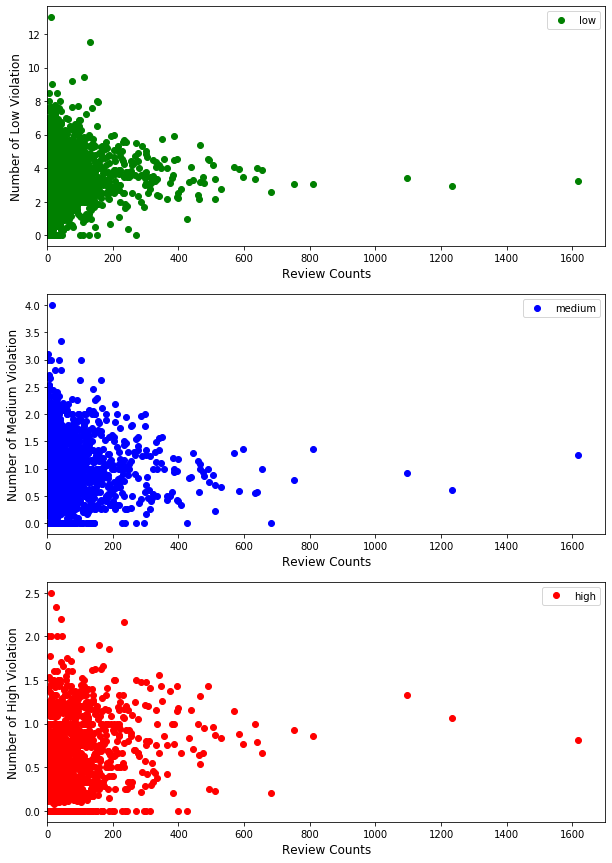

In [51]:
subset_data = data[["review_count", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "review_count"])['low', 'medium', 'high'].mean().reset_index()

figure, axes = plt.subplots(3, 1, figsize=(10, 15))

subset_data.plot('review_count', 'low', marker='o',
                 linestyle='', ax=axes[0], color='g')
axes[0].set_xlabel('Review Counts', fontsize=12)
axes[0].set_ylabel('Number of Low Violation', fontsize=12)
axes[0].set_xlim([0, 1700])

subset_data.plot('review_count', 'medium', marker='o',
                 linestyle='', ax=axes[1], color='b')
axes[1].set_xlabel('Review Counts', fontsize=12)
axes[1].set_ylabel('Number of Medium Violation', fontsize=12)
axes[1].set_xlim([0, 1700])

subset_data.plot('review_count', 'high', marker='o',
                 linestyle='', ax=axes[2], color='r')
axes[2].set_xlabel('Review Counts', fontsize=12)
axes[2].set_ylabel('Number of High Violation', fontsize=12)
axes[2].set_xlim([0, 1700])

plt.show()

We notice that no matter how many review counts each restaurant has, it can make low, medium and high violations. However, the highest numbers of any type of violation were made by restaurants with low review counts.

# Violations by Zip Codes

We now look at the distribution of each type of violations on the map of zip codes of Allegheny County. This can help us identify if there is any neighborhood where low, medium or high violations mostly occur.

We load the geojson file of the zip codes of Allegheny county, downloaded from this [website](https://catalog.data.gov/dataset/allegheny-county-zip-code-boundaries-9a066/resource/dc0578b7-ecfd-49ee-94b6-c6ba953a92c5).

In [52]:
dfc = gpd.read_file('Boundaries.geojson')

For each zip code, we find the mean of low, medium and high violations.

In [53]:
places = data[["zip","low",'medium','high']]
places = places.groupby("zip").mean().reset_index()
places['zip'] = places.zip.astype('int')
dfc['ZIP'] = dfc.ZIP.astype('int')

In [54]:
dfc = dfc.merge(places,left_on="ZIP",right_on="zip",how="left")

We now plot the choropleth map for low violations.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


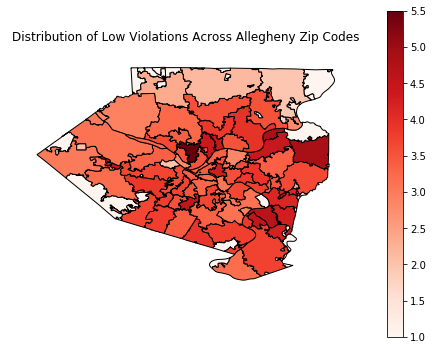

In [55]:
ax = gplt.choropleth(dfc, hue='low', cmap='Reds', legend=True)
ax.set_title("Distribution of Low Violations Across Allegheny Zip Codes")
plt.show()

We now plot the choropleth map of medium violations.

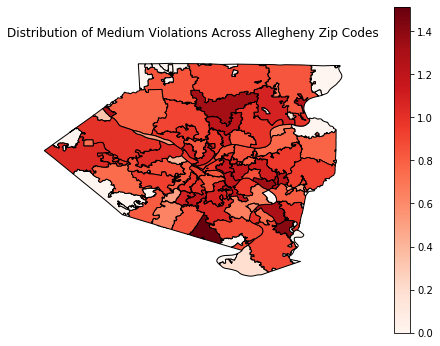

In [56]:
ax = gplt.choropleth(dfc, hue='medium', cmap='Reds', legend=True)
ax.set_title("Distribution of Medium Violations Across Allegheny Zip Codes")
plt.show()

We now plot the choropleth map of high violations.

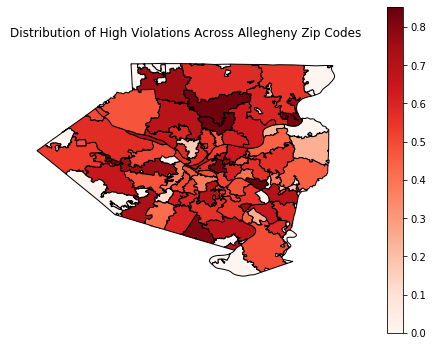

In [57]:
ax = gplt.choropleth(dfc, hue='high', cmap='Reds', legend=True)
ax.set_title("Distribution of High Violations Across Allegheny Zip Codes")
plt.show()

We notice that for the zipcode corresponding to the city of Pittsburgh, low violations were mostly concentrated, however for the same city, medium and high violations were less than those of other cities. Moreover, medium and high violations were more concentrated in the central north parts of Allegheny county. We can check the names of the top 5 neighborhoods in the number of violations.

In [67]:
dfc.sort_values('low',ascending=False).NAME.head(5)

118          PITTSBURGH
10           PITTSBURGH
23              OAKMONT
13     EAST MC KEESPORT
15           MCKEESPORT
Name: NAME, dtype: object

In [63]:
dfc.sort_values('medium',ascending=False).NAME.head(5)

48          SOUTH PARK
79          MCKEESPORT
35            BRADDOCK
63        ALLISON PARK
104    EAST PITTSBURGH
Name: NAME, dtype: object

In [62]:
dfc.sort_values('high',ascending=False).NAME.head(5)

35         BRADDOCK
74         GLENSHAW
63     ALLISON PARK
114         HARWICK
100      PITTSBURGH
Name: NAME, dtype: object

It would be interesting to check the economical and social conditions of each of these neighborhoods and link them to the type of violations observed.

# Violations and Yelp Attributes

Yelp dataset provides different attributes for each restaurant. We focus on three of theses attributes: alcohol (whether the restaurant provides alcohol or not), good for kids, and the price range, and examine their association with the violation detected.

## Alcohol

Does serving alcohol have any association with the hygiene practices of the restaurant? Let us first check this Yelp category and check its entries.

In [69]:
print(data.alcohol.unique())

["u'beer_and_wine'" "u'full_bar'" 'unknown' "u'none'" "'none'"
 "'full_bar'" "'beer_and_wine'" 'None']


We then map each of these entries to either 0 or 1, where 0 means "no alcohol served" and 1 means "alcohol served".

In [70]:
data.alcohol.replace(['u\'none\'','\'none\'','None'],0,inplace=True)
data.alcohol.replace(["u'beer_and_wine'", "u'full_bar'","'full_bar'",
       "'beer_and_wine'"],1,inplace=True)

In [71]:
data.alcohol.value_counts()

0          6998
1          6446
unknown    4931
Name: alcohol, dtype: int64

We now check th distribution of each type of violation.

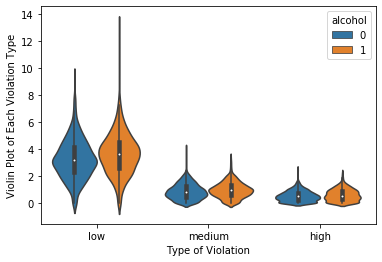

In [73]:
subset_data = data[data.alcohol!='unknown']
subset_data = subset_data[["alcohol", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "alcohol"])['low', 'medium', 'high'].mean().reset_index()
subset_data = subset_data.melt(['id', 'alcohol'],
                         var_name='violation', value_name='number')
sns.violinplot(data= subset_data, x='violation',y='number',hue='alcohol')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We see some slight differences in the distribution of violation numbers between alcohol and non-alcohol places, where there are more violation high in number in places that serve alcohol.

## Good For Kids

We now check if restaurants that are good for kids follow well the regulations.

We check first its entries.

In [75]:
data.good_for_kids.value_counts()

True       11186
unknown     4341
False       2848
Name: good_for_kids, dtype: int64

We now plot the violin plots of each violation.

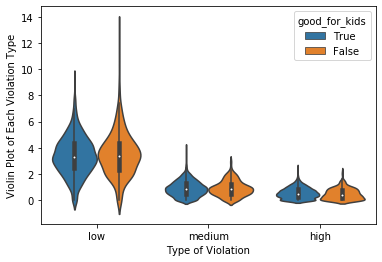

In [77]:
subset_data = data[data.good_for_kids != 'unknown']
subset_data = subset_data[["good_for_kids", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "good_for_kids"])['low', 'medium', 'high'].mean().reset_index()
subset_data = subset_data.melt(['id', 'good_for_kids'],
                               var_name='violation', value_name='number')
sns.violinplot(data=subset_data, x='violation', y='number', hue='good_for_kids')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We do not notice a lot of difference between the distributions of violations for this category. However, for low violation, we see higher number of violations in restaurants that are not good for kids.

## Price Range

Yelp also provides the price range for some restaurants. It is interesting now to check if expensive restaurants makes less violations or not.

We check first the entries of price range category.

In [78]:
data.price_range.value_counts()

2          9104
1          6992
unknown    1658
3           550
4            64
None          7
Name: price_range, dtype: int64

We now plot the distribution of each violation for each price range.

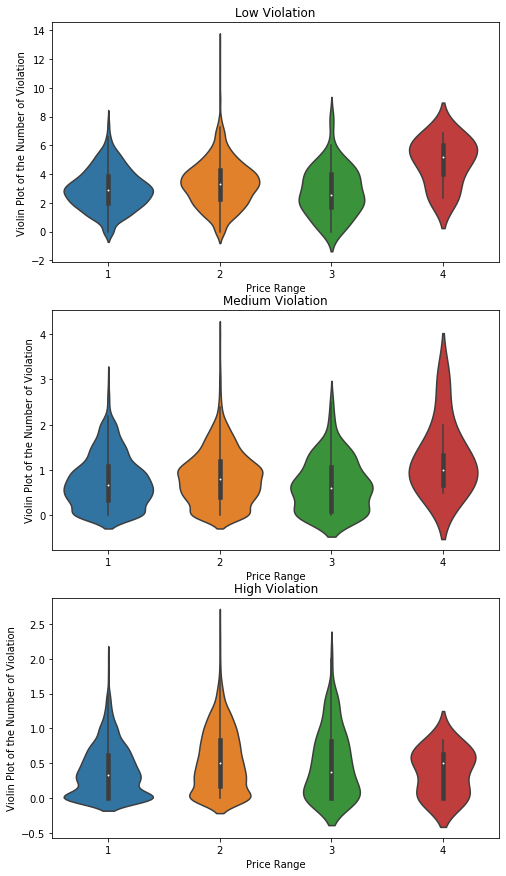

In [80]:
subset_data = data[(data.price_range != 'unknown')
                   & (data.price_range != 'None')]
subset_data = subset_data[["price_range", 'id', 'low', 'medium', 'high']].groupby(
    ["id", "price_range"])['low', 'medium', 'high'].mean().reset_index()


figure, axes = plt.subplots(3, 1, figsize=(8, 15))


sns.violinplot(data=subset_data, x='price_range',
               y='low', ax=axes[0])
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Violin Plot of the Number of Violation')
axes[0].set_title('Low Violation')

sns.violinplot(data=subset_data, x='price_range',
               y='medium', ax=axes[1])
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Violin Plot of the Number of Violation')
axes[1].set_title('Medium Violation')

sns.violinplot(data=subset_data, x='price_range',
               y='high', ax=axes[2])
axes[2].set_xlabel('Price Range')
axes[2].set_ylabel('Violin Plot of the Number of Violation')
axes[2].set_title('High Violation')

plt.show()

Interestingly, if a restaurant is expensive, this does not ensure that violations do not occur. Any type of violation can occur in expensive restaurants.

# Violations and Yelp Categories

Other than attributes, Yelp also provides a set of categories for each restaurant that identify the type of cuisine, any specialty food served and some more characteristic of the inspected place. 

## Cuisine

Do certain cuisines make restaurants more prone to make violations in food handling? Let us check the number of violations for each cuisine type.

We first form a column for each cuisine that identifies if the cuisine is served or not in the restaurant. We are doing so because restaurants can serve multiple cuisines.

In [82]:
cuisines = ["American", "Italian", "French", "Mediterranean", 
            "Spanish", "European", "Mexican", "Latin American", 
            "African", "Caribbean", "Southern", "Japanese", 
            "Chinese", "E Asian", "N/C Asian","SE Asian", "Indian", 
            "Australian"]

for csn in cuisines:
    data[csn] = 'False'
    
for index, row in data.iterrows():
    if (len(eval(row.cuisine))==0):
        for csn in cuisines:
            data.at[index,csn] = 'None'
    else:
        for csn in eval(row.cuisine):
            data.at[index,csn] = 'True'

We then find the mean and maximum number of violations that occurred in each type of cuisine.

In [83]:
cu = pd.DataFrame()
for csn in cuisines:
    subset_data = data[['id', csn, 'low', 'medium', 'high']].groupby(['id', csn])[
        'low', 'medium', 'high'].mean().reset_index()
    cu = cu.append(subset_data[[csn, 'low', 'medium', 'high']].groupby(
        csn).agg([np.mean,max]).loc['True'])
cu = cu.assign(cuisine = cuisines)

We plot the results for each type of violation.

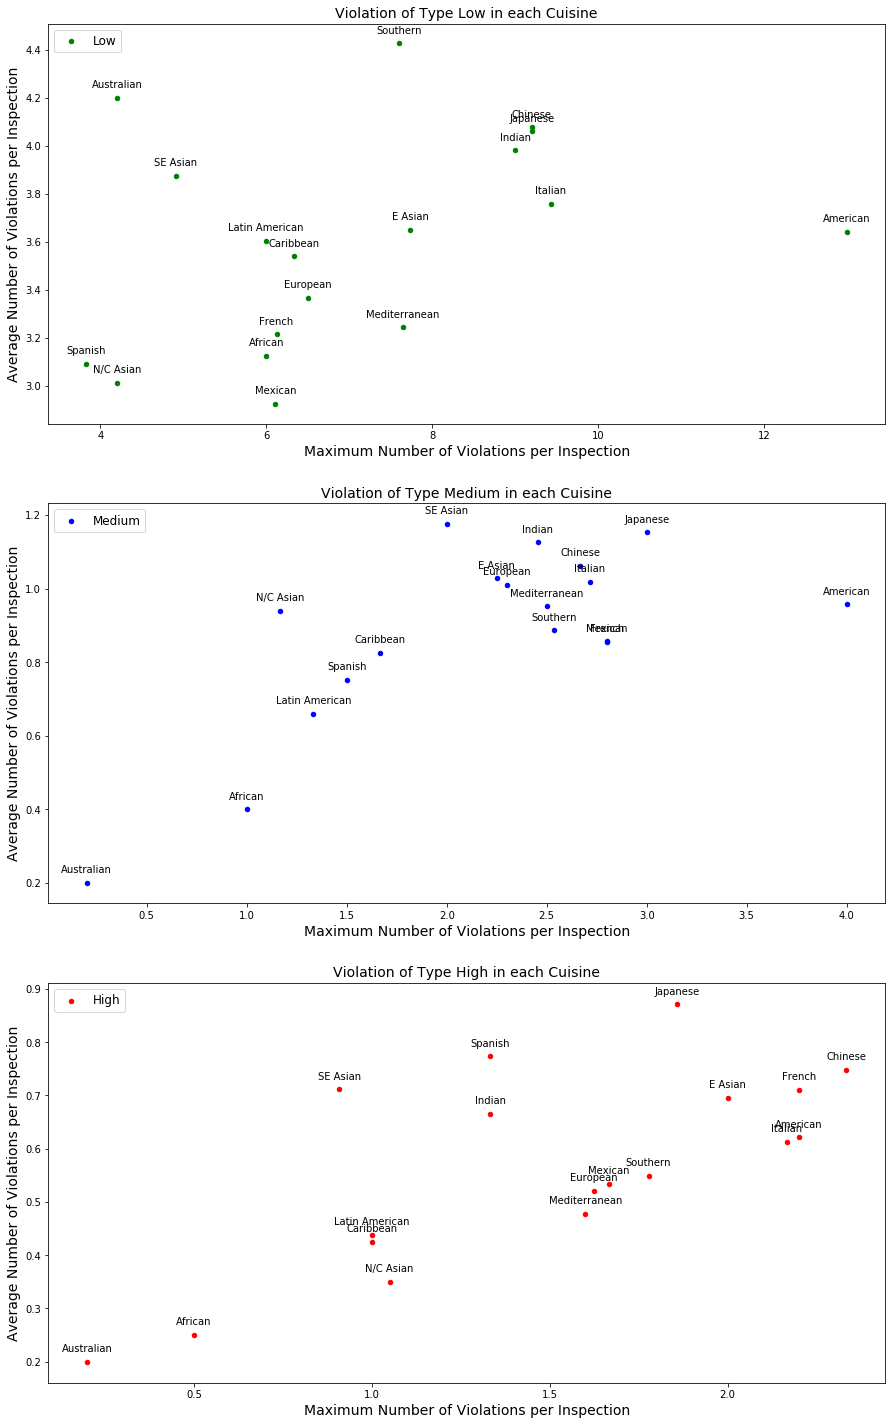

In [84]:
figure, axes = plt.subplots(3, 1, figsize=(15, 25))

cu.plot.scatter(('low', 'max'), ('low','mean'), c='g', label='Low', ax=axes[0])
for x, y, place in zip(cu[('low', 'max')], cu[('low','mean')],
                       cu.cuisine):
    axes[0].annotate(place,  
                     (x, y),  
                     textcoords="offset points", 
                     xytext=(0, 10),  
                     ha='center')
axes[0].set_title('Violation of Type Low in each Cuisine', fontsize=14)

cu.plot.scatter(('medium', 'max'), ('medium','mean'),
                         c='b', label='Medium', ax=axes[1])
for x, y, place in zip(cu[('medium', 'max')], cu[('medium', 'mean')],
                        cu.cuisine):
    axes[1].annotate(place,  
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[1].set_title('Violation of Type Medium in each Cuisine', fontsize=14)

cu.plot.scatter(('high','max'), ('high','mean'),
                         c='r', label='High', ax=axes[2])
for x, y, place in zip(cu[('high','max')], cu[('high','mean')],
                       cu.cuisine):
    axes[2].annotate(place, 
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[2].set_title('Violation of Type High in each Cuisine', fontsize=14)

for axe in axes:
    axe.set_ylabel('Average Number of Violations per Inspection', fontsize=14)
    axe.set_xlabel('Maximum Number of Violations per Inspection', fontsize=14)
    axe.legend(loc='upper left', fontsize=12)

plt.show()

We see that for any type of violation, the following cuisines: Japanese, Chinese and American have high average number of violations or high maximum number of violations. We also have the Southern cuisine for low violations and the French cuisines for high violations.

## Specialty Food

Each restaurant might be specified in some type of food: pizza, fast food, sushi, etc.,... If a restaurant serves some  type of food, can this specialization make the restaurant more likely to make a violation?

Let us first form a column for each special food that identifies if the specific food is served or not in the restaurant. 

In [88]:
foods = ["Pizza", "Fast/Fried Foods", "Burgers", "Dessert", 
         "Bagels/Pretzels", "Gelato", "Seafood", "BBQ", "Steaks", 
         "Vegetarian", "Vegan", "Gluten-Free", "Noodles", "Tacos",
         "Sandwiches", "Sushi", "Kosher", "Fruit/Veg", "Other"]

for fd in foods:
    data[fd] = 'False'
    
for index, row in data.iterrows():
    if (len(eval(row.special_food))==0):
        for fd in foods:
            data.at[index,fd] = 'None'
    else:
        for fd in eval(row.special_food):
            data.at[index,fd] = 'True'

We then find the mean and maximum number of violations for each specialized restaurant.

In [89]:
fo = pd.DataFrame()
for fd in foods:
    subset_data = data[['id', fd, 'low', 'medium', 'high']].groupby(['id', fd])[
        'low', 'medium', 'high'].mean().reset_index()
    fo = fo.append(subset_data[[fd, 'low', 'medium', 'high']].groupby(
            fd).agg([np.mean,max]).loc['True'])
    
fo = fo.assign(specialty_food = foods)

We plot the obtained results.

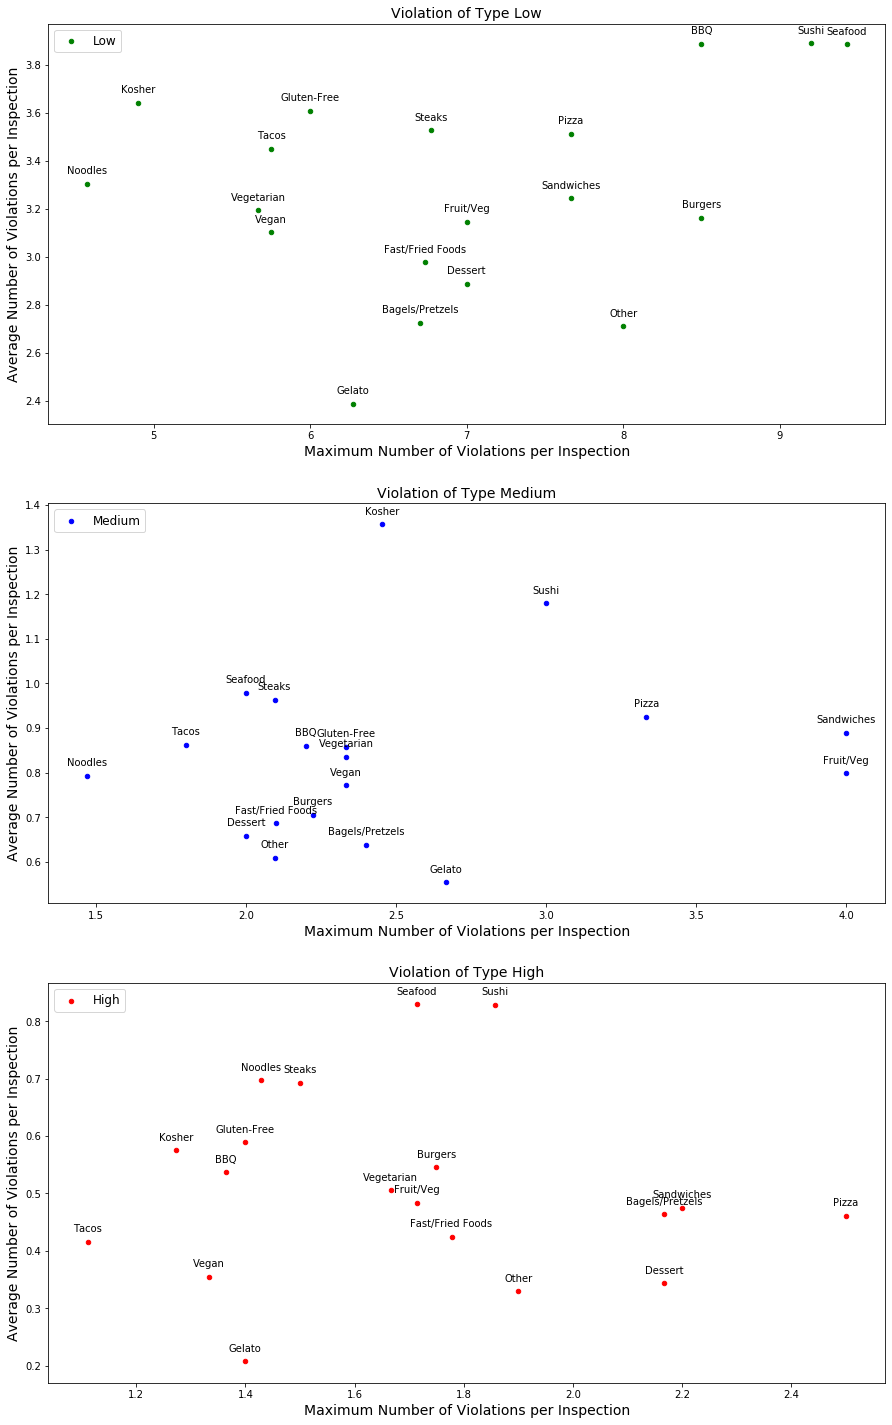

In [90]:
figure, axes = plt.subplots(3, 1, figsize=(15, 25))

fo.plot.scatter(('low', 'max'), ('low','mean'), c='g', label='Low', ax=axes[0])
for x, y, food in zip(fo[('low', 'max')], fo[('low','mean')],
                       fo.specialty_food):
    axes[0].annotate(food,  
                     (x, y),  
                     textcoords="offset points", 
                     xytext=(0, 10),  
                     ha='center')
axes[0].set_title('Violation of Type Low', fontsize=14)

fo.plot.scatter(('medium', 'max'), ('medium','mean'),
                         c='b', label='Medium', ax=axes[1])
for x, y, food in zip(fo[('medium', 'max')], fo[('medium', 'mean')],
                        fo.specialty_food):
    axes[1].annotate(food,  
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[1].set_title('Violation of Type Medium', fontsize=14)

fo.plot.scatter(('high','max'), ('high','mean'),
                         c='r', label='High', ax=axes[2])
for x, y, food in zip(fo[('high','max')], fo[('high','mean')],
                       fo.specialty_food):
    axes[2].annotate(food, 
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[2].set_title('Violation of Type High', fontsize=14)

for axe in axes:
    axe.set_ylabel('Average Number of Violations per Inspection', fontsize=14)
    axe.set_xlabel('Maximum Number of Violations per Inspection', fontsize=14)
    axe.legend(loc='upper left', fontsize=12)

plt.show()

We see that for low and high violations, places that serve Sushi and Seafood have high average number of violations or high maximum number of violations. Sushi and Seafood places involve raw fish, whose wrong handling make the restaurants more prone to make violations. On the other hand, for medium violations, we have places that serve Sushi and Kosher. We also notice that Pizza places have relatively high maximum or mean number of violation, for medium and high violations. 

## Place

This category provides more characteristics of the place inspected, which might not only be a restaurant. It can also be a food shop, bakery or grocery shop.

We form a column for each possible type of place.

In [91]:
places = ["Restaurants", "Mobile", "Convenience Store", "Grocery Store",
          "Food Shop", "Bakeries", "Coffee Place", "Other Goods",
          "Shopping", "Services", "Entertainment/Event Place", 
          "Fitness/Sport Place",
          "Teaching/School Place", "Religious Place",
          "Health & Medical Place", "Pub/Bars", "Liquor Manufacturing"]

for pl in places:
    data[pl] = 'False'
    
for index, row in data.iterrows():
    if (len(eval(row.place))==0):
        for pl in places:
            data.at[index,pl] = 'None'
    else:
        for pl in eval(row.place):
            data.at[index,pl] = 'True'

We then compute the average and maximum number of violations for each type of place.

In [92]:
place = pd.DataFrame()
for pl in places:
    subset_data = data[['id', pl, 'low', 'medium', 'high']].groupby(['id', pl])[
        'low', 'medium', 'high'].mean().reset_index()
    place = place.append(subset_data[[pl, 'low', 'medium', 'high']].groupby(
            pl).agg([np.mean,max]).loc['True'])
    
place = place.assign(place = places)

We finally plot the results.

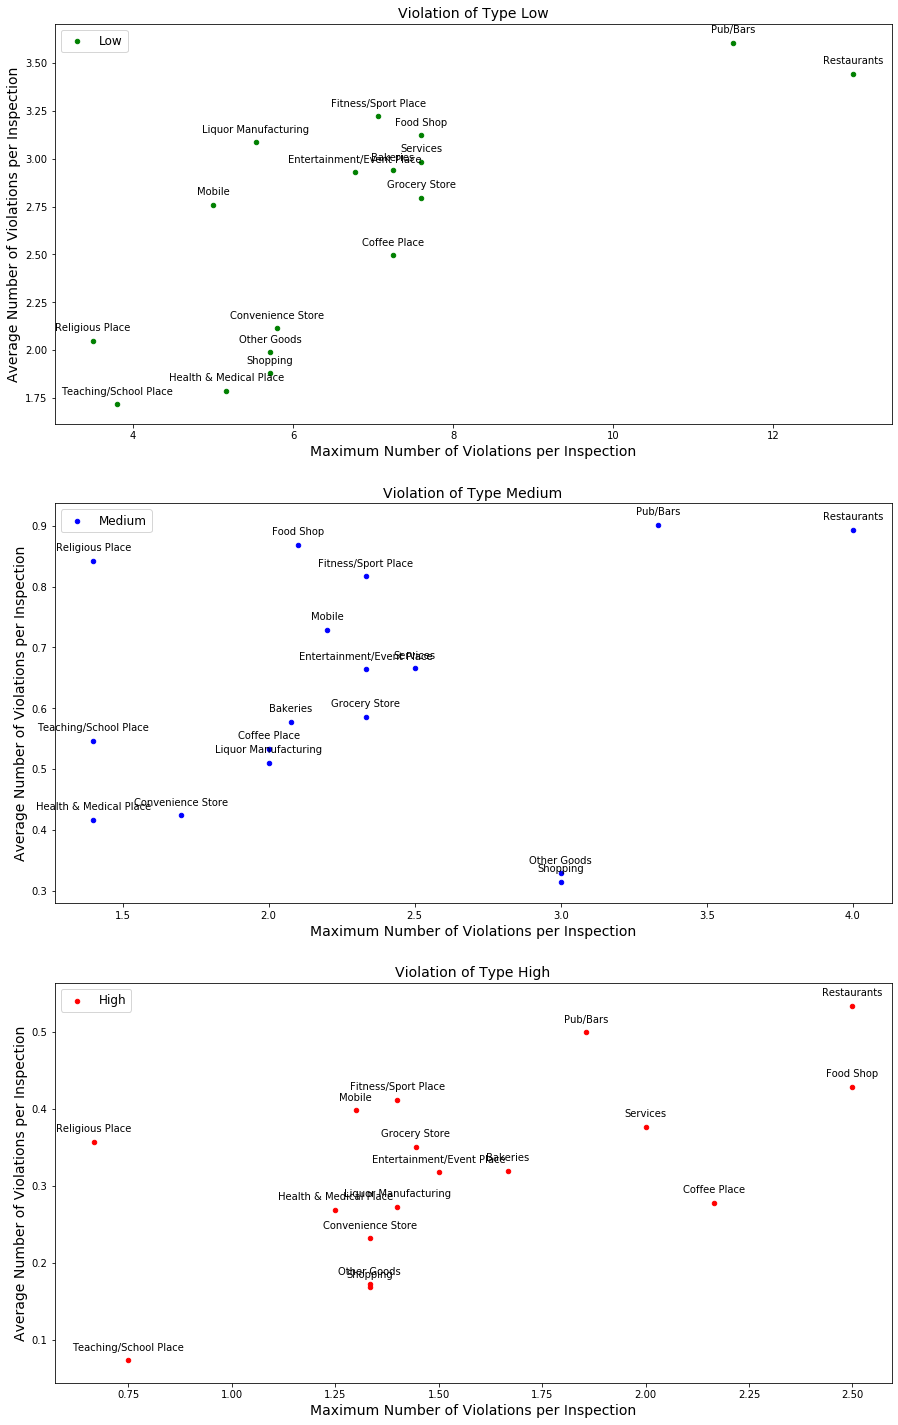

In [93]:
figure, axes = plt.subplots(3, 1, figsize=(15, 25))

place.plot.scatter(('low', 'max'), ('low','mean'), c='g', label='Low', ax=axes[0])
for x, y, pl in zip(place[('low', 'max')], place[('low','mean')],
                    place.place):
    axes[0].annotate(pl,  
                     (x, y),  
                     textcoords="offset points", 
                     xytext=(0, 10),  
                     ha='center')
axes[0].set_title('Violation of Type Low', fontsize=14)

place.plot.scatter(('medium', 'max'), ('medium','mean'),
                         c='b', label='Medium', ax=axes[1])
for x, y, pl in zip(place[('medium', 'max')], place[('medium', 'mean')],
                        place.place):
    axes[1].annotate(pl,  
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[1].set_title('Violation of Type Medium', fontsize=14)

place.plot.scatter(('high','max'), ('high','mean'),
                         c='r', label='High', ax=axes[2])
for x, y, pl in zip(place[('high','max')], place[('high','mean')],
                       place.place):
    axes[2].annotate(pl, 
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[2].set_title('Violation of Type High', fontsize=14)

for axe in axes:
    axe.set_ylabel('Average Number of Violations per Inspection', fontsize=14)
    axe.set_xlabel('Maximum Number of Violations per Inspection', fontsize=14)
    axe.legend(loc='upper left', fontsize=12)

plt.show()

Similar to what we previously obtained with the description column, restaurants are the most places where all the violations occur. On the other hand, violations occur less in "Teaching/School Place". Note that food shop have a high value for the maximum number of violations, this might be because food shops include meat shops.

# Do restaurants do better with time?

How each violation is changing from one inspection to another for each restaurant? Do they tend to decrease or increase? To answer these questions, we first find, for each restaurant, the difference in the number of violation between the current inspection and the previous inspection and then plot a histogram for the differences.

In [95]:
hist_vio = data[['inspect_dt','id','low','medium','high']]
hist_vio = hist_vio.sort_values("inspect_dt").groupby('id')
hist_vio = hist_vio[['low','medium','high']].diff()

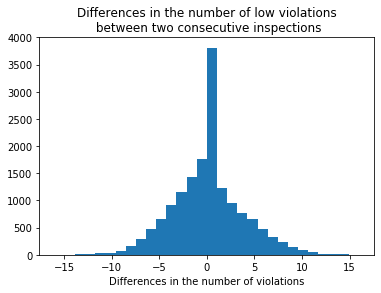

In [102]:
plt.hist(hist_vio['low'].dropna(), bins=30)
plt.title(
    'Differences in the number of low violations\n between two consecutive inspections')
plt.xlabel('Differences in the number of violations')
plt.show()

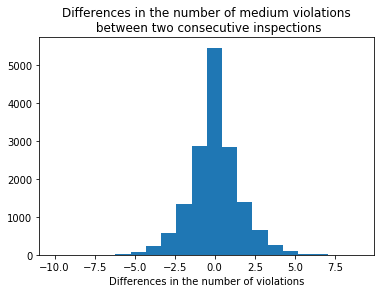

In [103]:
plt.hist(hist_vio['medium'].dropna(), bins=20)
plt.title(
    'Differences in the number of medium violations\n between two consecutive inspections')
plt.xlabel('Differences in the number of violations')
plt.show()

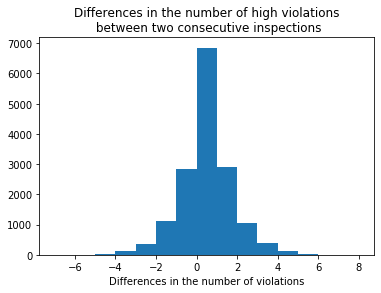

In [104]:
plt.hist(hist_vio['high'].dropna(),bins=15)
plt.title(
    'Differences in the number of high violations\n between two consecutive inspections')
plt.xlabel('Differences in the number of violations')
plt.show()

We notice that for all types of violations, we approximately have equal proportions of negative and positive differences. This means that restaurants do not always improve between two inspections

# Sentiment Analysis of Text Reviews

We now focus on the text reviews for each restaurant. We first perform sentiment analysis on the text reviews, which assigns a sentiment score for each text review. We then compare this sentiment score with the number of violations detected, to see if positive reviews are associated with clean restaurants or not.

We first load the reviews that we processed and cleaned.

In [134]:
reviews = pd.read_csv('rw.csv')
reviews.drop(index=reviews[reviews.clean_text.isnull()].index, inplace=True)

We now assign a sentiment score for each text review using "afinn" library.

In [111]:
from afinn import Afinn

af = Afinn()
reviews['sentiment_score'] = reviews.clean_text.apply(af.score)

We then compute the average of sentiment scores of all reviews that were mentioned 6 months before the inspection.

In [112]:
reviews = reviews[['business_id','sentiment_score','date']]
reviews['date'] = pd.to_datetime(reviews['date'])

from dateutil.relativedelta import relativedelta
subset = data[['encounter', 'inspect_dt',
               'low', 'medium', 'high', 'business_id']]
subset['inspect_dt_prev'] = subset.inspect_dt.apply(
    lambda s: pd.to_datetime(s)-datetime.timedelta(6*30))

grouped = subset.merge(reviews, on='business_id')

to_choose = (grouped.date < pd.to_datetime(grouped.inspect_dt)) & (
    grouped.date >= grouped.inspect_dt_prev)
grouped = grouped[to_choose]
grouped = grouped.groupby('encounter').sentiment_score.mean().reset_index()
subset = subset.merge(grouped, on='encounter')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


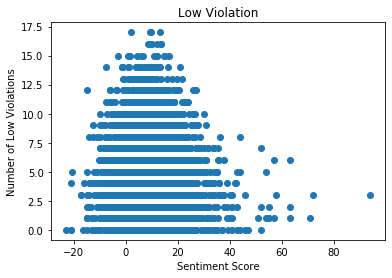

In [116]:
plt.scatter(y='low', x='sentiment_score', data=subset)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Low Violations")
plt.title("Low Violation")
plt.show()

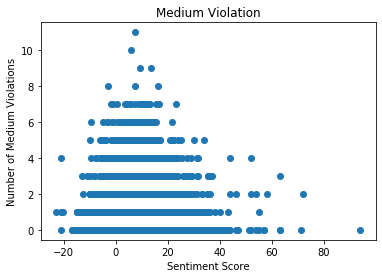

In [117]:
plt.scatter(y='medium', x='sentiment_score', data=subset)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Medium Violations")
plt.title("Medium Violation")
plt.show()

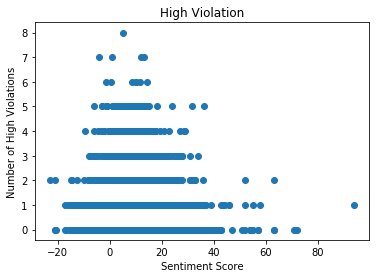

In [118]:
plt.scatter(y='high', x='sentiment_score', data=subset)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of High Violations")
plt.title("High Violation")
plt.show()

We notice that as the number of violations increases the range of sentiment score decreases and the maximum sentiment score decreases. 

# Topic Modeling

We now perform topic modeling on the text reviews to check the topics for each type of violations.

In [130]:
reviews = pd.read_csv('rw.csv')
reviews.drop(index=reviews[reviews.clean_text.isnull()].index, inplace=True)
rw = reviews[['business_id','date','clean_text']]
rw = rw.assign(date= pd.to_datetime(rw['date']))

We join the texts of all reviews that were mentioned 6 months before each inspection.

In [136]:
grouped = subset.merge(rw, on='business_id')

to_choose = (grouped.date < pd.to_datetime(grouped.inspect_dt)) & (
    grouped.date >= grouped.inspect_dt_prev)
grouped = grouped[to_choose]
grouped = grouped.groupby('encounter')[
    'clean_text'].apply(' '.join).reset_index()
subset = subset.merge(grouped, on='encounter')

To find the topics, we use the NMF module form sklearn library. 

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_features = 1000
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=no_features)

tfidf_low = tfidf_vectorizer.fit_transform(subset[subset.low>5].clean_text)
tfidf_low_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_med = tfidf_vectorizer.fit_transform(subset[subset.medium>4].clean_text)
tfidf_med_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_high = tfidf_vectorizer.fit_transform(subset[subset.high>2].clean_text)
tfidf_high_feature_names = tfidf_vectorizer.get_feature_names()

In [148]:
no_topics = 5

# Run NMF
nmf_low = NMF(n_components=no_topics, random_state=1,
          alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_low)
nmf_med = NMF(n_components=no_topics, random_state=1,
          alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_med)
nmf_high = NMF(n_components=no_topics, random_state=1,
          alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_high)

In [149]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print('Low Violations:')
display_topics(nmf_low, tfidf_low_feature_names, no_top_words)
print('\n')
print('Medium Violations:')
display_topics(nmf_med, tfidf_med_feature_names, no_top_words)
print('\n')
print('High Violations:')
display_topics(nmf_high, tfidf_high_feature_names, no_top_words)

Low Violations:
Topic 0:
not food go good get order place come time would
Topic 1:
pizza order delivery crust good hoagie not cheese slice pepperoni
Topic 2:
chinese food thai chicken dish not good rice order noodle
Topic 3:
sushi roll hibachi tuna rice fish chef salmon fresh chinese
Topic 4:
wing bar beer good burger great drink fry place selection


Medium Violations:
Topic 0:
not food good place get go order great come service
Topic 1:
sushi roll buffet hibachi tuna poke not fresh crab bento
Topic 2:
pizza delivery call order wing phone crust hoagie slice not
Topic 3:
chinese thai sichuan rice spicy dish noodle chicken food order
Topic 4:
indian buffet naan masala biryani food chicken paneer dish spice


High Violations:
Topic 0:
not food good get go place order great come service
Topic 1:
pizza delivery order crust slice pie good deliver topping time
Topic 2:
chinese thai food not noodle dish curry chicken order rice
Topic 3:
sushi roll hibachi tuna chef poke sashimi bento bowl fis